In [1]:
from IPython.display import HTML

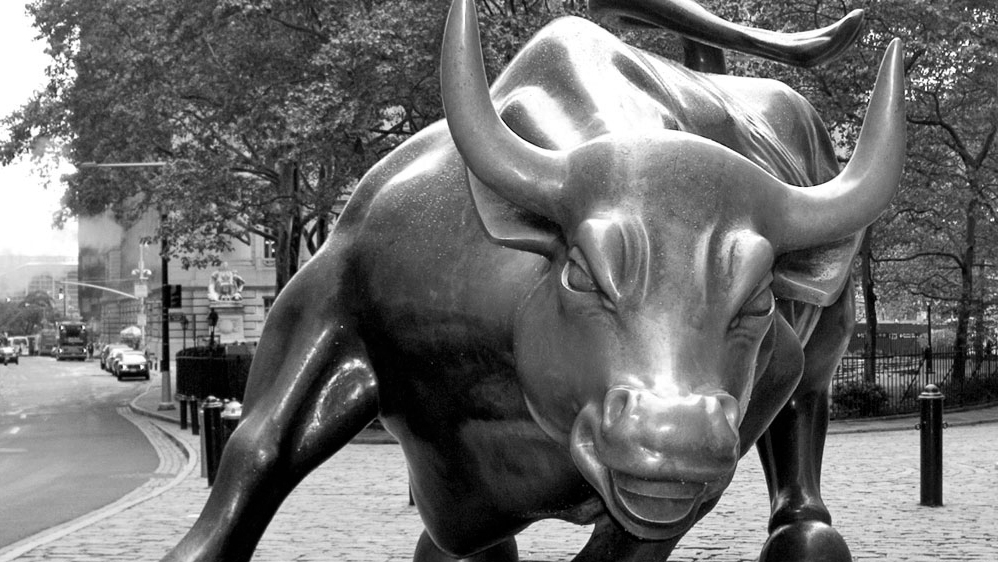

In [2]:
from IPython.display import Image
Image("stock_bull.png")

Portland Data Science Group: Stock Market Project
=======================

**By: Pieter Leffers**

*Starting Date: March 4, 2018*

*Completion Date: April 1st, 2018* 

Project Description
-----------

Driven by popular demand this project is a sequel to a previous attempt for the Portland Data Science Group to explore the stock market data. This time there was a twist, the regular attendees and members who enjoyed the previous exploration were seperated into two groups and were charged with competing against each other over who can predict the stock market the best.

More specifically, regular participants were seperated into two competing categories; Neural Networks models versus Non-Neural Network models. The prediction we were charged with was to see if stocks and economic indicators (housing,unemployment,etc) could be used to predict Exchange Traded Funds as well as the Russel 3000 from the second Quarter of 2018 to March 13 (essentially 13 weeks). Then we will apply the best model to forecast from Friday March 16 to Friday June 15 (13 weeks).


**Group Participants:**
- Pieter Leffers (Myself)
- Isil Berkun
- John Burt
- Mark Chesney
- Matt Cooper
- Kenny Liao
- John Mackrory
- Dipti Muni
- Manny Muro
- Jhoan Perras

Data Source(s):
    ---------

In [3]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from scipy import stats 
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle

Stage 1: Setting Up / Cleaning Data
======

Stocks Setup
--------------

**Closing**


*Definition:*
The amended closing price of a stock on any regular trading day, due to corporate actions such as splits, dividends, distributions and new offerings prior to the follow trading day's open, to rectify gapped prices and to present a clearer historical representation of the company's equity value.


In [195]:
#Subfolder where the file was saved
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
closingStocks=pd.read_csv(File_Location+'stocks-us-adjClose.csv',parse_dates=True,dayfirst=True,na_values=".")

#Rename first Row
closingStocks.rename(index=str, columns={"compiled from Yahoo! Finance data by Matt Borthwick": "Date"}, inplace=True)

#Set Date column
closingStocks['Date'] = pd.to_datetime(closingStocks['Date'], format = '%Y-%m-%d',  errors='coerce')

In [196]:
#Create new column names so that we can distinguish the different types of stock data
#This operation will take a minute or two

#This iterates over all columns of the dataset and appends a string to the name 
#   in order to designate which stock values it is associated with 
for i in closingStocks.columns:
    closingStocks.rename(index=str, columns={i:i+'-Close'}, inplace=True)
#Re-authoring the time element. This will be used in the future for merging.    
closingStocks.rename(index=str, columns={'Date-Close': 'Date'},inplace=True)

**High**

*Definition*: the highest price in a given period of time.

In [8]:
#Subfolder where the file was saved
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
highStocks=pd.read_csv(File_Location+'stocks-us-adjHigh.csv',parse_dates=True,dayfirst=True,na_values=".")
#Rename first Row
highStocks.rename(index=str, columns={"compiled from Yahoo! Finance data by Matt Borthwick": "Date"}, inplace=True)
#Set Date column
highStocks['Date'] = pd.to_datetime(highStocks['Date'], format = '%Y-%m-%d',  errors='coerce')

In [9]:
#Create new column names so that we can distinguish the different types of stock data
#This operation will take a minute or two
for i in highStocks.columns:
    highStocks.rename(index=str, columns={i:i+'-High'}, inplace=True)
highStocks.rename(index=str, columns={'Date-High': 'Date'},inplace=True)

**Low**

*Definition*: the lowest price in a given period of time.

In [10]:
#Subfolder where the file was saved
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
lowStocks=pd.read_csv(File_Location+'stocks-us-adjLow.csv',parse_dates=True,dayfirst=True,na_values=".")
#Rename first Row
lowStocks.rename(index=str, columns={"compiled from Yahoo! Finance data by Matt Borthwick": "Date"}, inplace=True)
#Set Date column
lowStocks['Date'] = pd.to_datetime(lowStocks['Date'], format = '%Y-%m-%d',  errors='coerce')

In [11]:
#Create new column names so that we can distinguish the different types of stock data
#This operation will take a minute or two
for i in lowStocks.columns:
    lowStocks.rename(index=str, columns={i:i+'-Low'}, inplace=True)
lowStocks.rename(index=str, columns={'Date-Low': 'Date'},inplace=True)

**Open**

*Definition*: The opening price is the price at which a security first trades upon the opening of an exchange on a given trading day


In [12]:
#Subfolder where the file was saved
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
openStocks=pd.read_csv(File_Location+'stocks-us-adjOpen.csv',parse_dates=True,dayfirst=True,na_values=".")
#Rename first Row
openStocks.rename(index=str, columns={"compiled from Yahoo! Finance data by Matt Borthwick": "Date"}, inplace=True)
#Set Date column
openStocks['Date'] = pd.to_datetime(openStocks['Date'], format = '%Y-%m-%d',  errors='coerce')

In [13]:
#Create new column names so that we can distinguish the different types of stock data
#This operation will take a minute or two
for i in openStocks.columns:
    openStocks.rename(index=str, columns={i:i+'-Open'}, inplace=True)
openStocks.rename(index=str, columns={'Date-Open': 'Date'},inplace=True)

**Volume**

*Definition*: The amount of shares bought and sold of a stock in a given period of time. It is important because the more volume the more people agree with the price of the stock.

In [14]:
#Subfolder where the file was saved
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
volStocks=pd.read_csv(File_Location+'stocks-us-Volume.csv',parse_dates=True,dayfirst=True,na_values=".")
#Rename first Row
volStocks.rename(index=str, columns={"compiled from Yahoo! Finance data by Matt Borthwick": "Date"}, inplace=True)
#Set Date column
volStocks['Date'] = pd.to_datetime(volStocks['Date'], format = '%Y-%m-%d',  errors='coerce')

In [15]:
#Create new column names so that we can distinguish the different types of stock data
#This operation will take a minute or two
for i in volStocks.columns:
    volStocks.rename(index=str, columns={i:i+'-Vol'}, inplace=True)
volStocks.rename(index=str, columns={'Date-Vol': 'Date'},inplace=True)

In [16]:
#These were coded as int and changing to float to match like datasets (open,low,high,close)
volStocks['ED-Vol']=(volStocks['ED-Vol']).astype('float')
volStocks['CVX-Vol']=(volStocks['CVX-Vol']).astype('float')
volStocks['FL-Vol']=(volStocks['FL-Vol']).astype('float')
volStocks['CAT-Vol']=(volStocks['CAT-Vol']).astype('float')
volStocks['IP-Vol']=(volStocks['IP-Vol']).astype('float')

*Check to see if correctly imported*

In [31]:
closingStocks.columns

Index(['Date', 'ED-Close', 'DD-Close', 'CVX-Close', 'FL-Close', 'CAT-Close',
       'IP-Close', 'SJW-Close', 'F-Close', 'LLY-Close',
       ...
       'EXTN-Close', 'VYGR-Close', 'ACG-Close', 'MIME-Close', 'TCRZ-Close',
       'MCX-Close', 'EDIT-Close', 'LMHA-Close', 'UA-Close', 'BTU-Close'],
      dtype='object', length=711)

Company Information: Setup/Cleaning
===================
*This file has the company names listed for the stocks as well as the industry sectors associated with them.*


In [32]:
#Subfolder where the file was saved
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
companyInfo=pd.read_csv(File_Location+'Company_information.csv',encoding='latin1',keep_default_na=False)
#Rename first Row
companyInfo.rename(index=str, columns={'Company.Name': 'CompanyName'}, inplace=True)
companyInfo.to_pickle('companyInfo.pickle') 

In [33]:
companyInfo.head()

,Symbol,CompanyName,Sector,Industry
0,ED,"Consolidated Edison, Inc.",Utilities,Electric Utilities
1,DD,E. I. du Pont de Nemours and Company,Basic Materials,Agricultural Chemicals
2,CVX,Chevron Corporation,Basic Materials,Major Integrated Oil & Gas
3,FL,"Foot Locker, Inc.",Consumer Goods,Textile - Apparel Footwear & Accessories
4,CAT,Caterpillar Inc.,Industrial Goods,Farm & Construction Machinery


Exchange Traded Funds (ETFs): Setup/Cleaning
-------------------------------

An ETF, or exchange-traded fund, is a marketable security that tracks an index, a commodity, bonds, or a basket of assets like an index fund. Unlike mutual funds, an ETF trades like a common stock on a stock exchange. ETFs experience price changes throughout the day as they are bought and sold. ETFs typically have higher daily liquidity and lower fees than mutual fund shares, making them an attractive alternative for individual investors.

https://www.investopedia.com/terms/e/etf.asp

Sector 2

In [34]:
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
Sector2=pd.read_csv(File_Location+'sector_ETFs-2.csv',na_values=".")
Sector2['Date'] = pd.to_datetime(Sector2['Date'], format = '%Y-%m-%d',  errors='coerce')
Sector2.to_pickle('Sector2.pickle') 

In [35]:
Sector2.head()

,Date,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Market (^RUA)
0,2017-09-11,149.061020,92.860146,121.352348,162.838715,173.379364,138.134369,1471.199951
1,2017-09-12,149.280106,93.653656,121.362267,163.694351,173.697495,135.771484,1476.680054
2,2017-09-13,149.160599,93.693329,121.292877,164.808655,173.091064,135.128860,1477.709961
3,2017-09-14,148.622879,94.129761,121.431656,163.823685,173.409180,136.206497,1476.099976
4,2017-09-15,149.110825,94.308296,121.649742,163.584900,172.753052,136.354797,1479.280029


Sector 6

In [36]:
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
Sector6=pd.read_csv(File_Location+'6sector_ETFs.csv',na_values=".")
Sector6['Date'] = pd.to_datetime(Sector6['Date'], format = '%Y-%m-%d',  errors='coerce')
Sector6.to_pickle('Sector6.pickle') 

In [37]:
Sector6.tail()

,Date,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU)
4349,2017-09-01,149.100861,92.463394,120.529594,163.167038,169.770630,135.633087
4350,2017-09-05,147.656967,91.263222,120.192558,162.589981,168.935532,135.900024
4351,2017-09-06,147.955704,91.560776,120.400726,163.565002,169.720917,135.207962
4352,2017-09-07,148.423721,91.699638,120.509766,162.709366,171.331421,136.246048
4353,2017-09-08,147.039566,91.540939,120.301598,162.012939,172.077026,136.928207


Entire Market  (Russell 3000): Setup/Cleaning
-------------------------------

The Russell 3000 Index is a market capitalization weighted equity index maintained by the FTSE Russell that provides exposure to the entire U.S. stock market. The index tracks the performance of the 3,000 largest U.S.-traded stocks which represent about 98% of all U.S incorporated equity securities.  
https://www.investopedia.com/terms/r/russell_3000.asp

In [38]:
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
RUA3000=pd.read_csv(File_Location+'market.csv',na_values=".")
RUA3000['Date'] = pd.to_datetime(RUA3000['Date'], format = '%Y-%m-%d',  errors='coerce')

In [39]:
RUA3000.to_pickle('RUA3000.pickle') 
RUA3000.head()

,Date,Entire Market (^RUA)
0,1987-09-10,178.830002
1,1987-09-11,181.339996
2,1987-09-14,181.789993
3,1987-09-15,179.270004
4,1987-09-16,177.889999


Economic Indicators: Setup/Cleaning
-------------------------------

*The economic indicators file needed some work because some of the information didn't play nice when importing it. There were labels that were intefering with column headings, the file had non-ascii characters in it, and the numbers had commas in them making it difficult to use as anything other than a string. *

In [40]:
File_Location='C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/'
indicators=pd.read_csv(File_Location+'Indicators_Train.csv',na_values='.', encoding='utf-8')
indicators.drop(['Unnamed: 0'], axis=1, inplace=True)

#Change the formatting of the variables. Datetime to the ones for dates, integers for the ones that aren't
for i in range(0,len(indicators.columns)):
    if i % 2 == 0:
        indicators[indicators.columns[i]] = pd.to_datetime(indicators[indicators.columns[i]], format = '%m/%d/%Y',  errors='coerce') 
    else:
        indicators[indicators.columns[i]] = pd.to_numeric(indicators[indicators.columns[i]], errors='ignore')
#changing name to match other dataset names
indicators.rename(index=str, columns={'date': 'Date'},inplace=True)
#cutting off missing rows at the end of the dataset
indicators=indicators[:-216].copy()
indicators.to_pickle('indicators.pickle') 

In [41]:
#Grabbing columns from indicators dataset that we will be using. 
#I dropped the others because we won't be using them.
redIndicate=indicators[['Date','HOUST','UNRATENSA','EMRATIO','UEMPMED','UMCSENT','USSLIND','KCFSI','IPMAN','VIXCLS','DGS10']].copy()
redIndicate.to_pickle('redIndicate.pickle') 

In [42]:
#Here is a list of all the stock dataframes
FrameList = [closingStocks,highStocks,lowStocks,volStocks,openStocks]
#This code concatenates all of the dataframes on the 'Date' columns and resets the index
All_Stocks=pd.concat([d.set_index('Date') for d in FrameList], axis=1).reset_index()
All_Stocks.to_pickle('All_Stocks.pickle') 

In [43]:
#This code merges the rest of the dataframes to the previously made stock dataframe. 
#     this was essential because one of the dataframes had an incorrect indexing and row number
#     so I had to do a left merge to make sure they fit the number of observations of stock data (date range)
Kitchen_Sink=All_Stocks.merge(redIndicate,how='left',on='Date').merge(Sector6,how='left',on='Date').merge(RUA3000,how='left',on='Date')
#Adding time seperators to the large newly created dataframe
Kitchen_Sink['year'], Kitchen_Sink['week'], Kitchen_Sink['day']=Kitchen_Sink['Date'].dt.year, Kitchen_Sink['Date'].dt.week, Kitchen_Sink['Date'].dt.weekday_name
Kitchen_Sink.to_pickle('Kitchen_Sink_Full.pickle') 
#Kitchen Sink seperated by weekly
Kitchen_Sink_Weekly= Kitchen_Sink.groupby([Kitchen_Sink['year'],Kitchen_Sink['week']]).mean()
Kitchen_Sink_Weekly.to_pickle('Kitchen_Sink_Weekly.pickle') 
#restricting this dataframe to just Friday days
Kitchen_Friday=Kitchen_Sink[Kitchen_Sink['day']=='Friday']
Kitchen_Friday.to_pickle('Kitchen_Sink_Friday.pickle') 

#final list:
#All_stocks
#Kitchen Sink Full
#Kitchen Sink Weekly
#Kitchen Sink Friday
#Indicators
#CompanyInfo

In [44]:
Kitchen_Friday[:15]

,Date,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,...,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA),year,week,day
0,1970-01-02,0.307997,0.000480,0.582503,1.857836,1.475225,1.808415,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,1,Friday
5,1970-01-09,0.315127,0.000465,0.588077,1.797122,1.368583,1.814324,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,2,Friday
10,1970-01-16,0.298016,0.000457,0.556025,1.791050,1.368583,1.684307,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,3,Friday
15,1970-01-23,0.307997,0.000448,0.543483,1.772837,1.350809,1.642939,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,4,Friday
20,1970-01-30,0.307997,0.000435,0.514219,1.647265,1.293045,1.554293,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,5,Friday
25,1970-02-06,0.307860,0.000431,0.517986,1.684007,1.293045,1.702038,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,6,Friday
30,1970-02-13,0.302132,0.000429,0.492511,1.665637,1.324149,1.767046,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,7,Friday
35,1970-02-20,0.307860,0.000435,0.520816,1.745244,1.395244,1.677501,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,8,Friday
39,1970-02-27,0.315019,0.000445,0.537799,1.671760,1.413018,1.737198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,9,Friday
44,1970-03-06,0.319315,0.000450,0.522231,1.757491,1.461896,1.731229,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,10,Friday


Stage 2: Data Preperation for Model / Building Simple Model
=====

In [3]:
#Load all the data (to avoid having to recreate the datasets and continuing on from this point)
Kitchen_Sink=pd.read_pickle('Kitchen_Sink_Full.pickle')
Kitchen_Friday=pd.read_pickle('Kitchen_Sink_Friday.pickle') 
Kitchen_Sink_Weekly=pd.read_pickle('Kitchen_Sink_Weekly.pickle')
All_Stocks=pd.read_pickle('All_Stocks.pickle')
companyInfo=pd.read_pickle('companyInfo.pickle')
redIndicate=pd.read_pickle('redIndicate.pickle')

In [3]:
def sumData(data):
    '''
    This is a function I created to spit out a Comma Seperated Variable file that 
        has a lot of diagnostic descriptive statistics such as mean,count,quantiles and such. 
        This is useful for getting a quick glance at large datasets without having to look at the whole file.
        This doesn't ALWAYS work it kind of depends on the formatting of the dataset.
        Future: This can be compacted into a much cleaner form.
    '''
    #Create generic table with columns with the same column names as dataset
    table=pd.DataFrame(columns=data.columns)
    #Create row names for the table 
    table_rows=pd.Series(['DataType','ZeroVals','NullVals','Dupes','MinVal','MaxVal','AvgVal','StandDev','MedianVal','Quantile25','Quantile50','Quantile75','Quantile90','Counts'])
    #Create variables to contain values
    DtypeVal,ZeroVals,NullVals,DupeBool,MinVal,MaxVal,AvgVal,StandDev,MedianVal,Quantile25,Quantile50,Quantile75,Quantile90,Counts=[],[],[],[],[],[],[],[],[],[],[],[],[],[]

    for i in data.columns: 
        DtypeVal.append(np.dtype(data[i]))
        NullVals.append(data[i].isnull().sum())
        DupeBool.append(pd.Series(sum(pd.Series(data[i].duplicated()))).item())
        ZeroVals.append((data[i]==0).sum())
        MinVal.append((data[i].min()))
        MaxVal.append((data[i].max()))
        Counts.append((data[i].count()))
        if np.dtype(data[i]) == 'int' or np.dtype(data[i]) == 'float':
            AvgVal.append((data[i].mean()))
            StandDev.append((data[i].mean()))
            MedianVal.append((data[i].median())) 
            Quantile25.append((data[i].quantile(.25)))     
            Quantile50.append((data[i].quantile(.5)))     
            Quantile75.append((data[i].quantile(.75)))     
            Quantile90.append((data[i].quantile(.9)))
        else:          
            AvgVal.append('invalid')
            StandDev.append('invalid')
            MedianVal.append('invalid')  
            Quantile25.append('invalid') 
            Quantile50.append('invalid')     
            Quantile75.append('invalid')     
            Quantile90.append('invalid')
            
    table=table.append(pd.Series(DtypeVal, index=data.columns),ignore_index=True) 
    table=table.append(pd.Series(ZeroVals, index=data.columns),ignore_index=True) 
    table=table.append(pd.Series(NullVals, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(DupeBool, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(MinVal, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(MaxVal, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(MedianVal, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(AvgVal, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(StandDev, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Quantile25, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Quantile50, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Quantile75, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Quantile90, index=data.columns),ignore_index=True)
    table=table.append(pd.Series(Counts, index=data.columns),ignore_index=True)
    
    table.insert(loc=0, column='Estimates', value=table_rows)
    table.to_csv('sumTable.csv', sep=',')
    return table

In [5]:
companyInfo.Sector.unique()

array(['Utilities', 'Basic Materials', 'Consumer Goods',
       'Industrial Goods', 'Healthcare', 'NA', 'Services', 'Financial',
       'Technology', 'Conglomerates'], dtype=object)

In [6]:
# Technology, Basic Materials, Consumer Goods, Services, Healthcare, Utilities (Within ETFs)
companyInfo_GB = companyInfo.groupby(companyInfo['Sector']).count()
#Industry counts where there are greater than 6 stocks associated
companyInfo_GB

,Symbol,CompanyName,Industry
Sector,,,
Basic Materials,66,66,66
Conglomerates,1,1,1
Consumer Goods,57,57,57
Financial,119,119,119
Healthcare,49,49,49
Industrial Goods,33,33,33
NA,160,160,160
Services,106,106,106
Technology,101,101,101


**Narrowing focus to 'Industry' contained in Exchange Traded Funds (ETFs)**

*Technology, Basic Materials, Consumer Goods, Services, Healthcare, Utilities*


In [7]:
ETFSectors=companyInfo[companyInfo['Sector']==('Technology' or 'Basic Materials' or 'Consumer Goods' or 'Services' or 'Healthcare' or 'Utilities')]
ETFSectorsList=list(ETFSectors['Symbol'])#Create list of of the stocks

In [8]:
ETFSectors.head()

,Symbol,CompanyName,Sector,Industry
36,ADI,"Analog Devices, Inc.",Technology,Semiconductor - Integrated Circuits
42,CTS,CTS Corporation,Technology,Diversified Electronics
53,AGYS,"Agilysys, Inc.",Technology,Application Software
74,INTC,Intel Corporation,Technology,Semiconductor - Broad Line
76,CTG,"Computer Task Group, Incorporated",Technology,Information Technology Services


Associated ETF Stocks
-----------------

In [9]:
import re
#create a register of unique column names from dataset
register=[]
for i in All_Stocks.columns.unique():
    register.append(i)
#create a basic dataframe to add results to
ETFresults=pd.DataFrame()
#for loop using regular expression looking for the names specified above
#Future make a function that does all this in one go with just naming an industry
for i in ETFSectorsList:
    #Fancy footwork here
    IndustryPattern=re.compile(r"'("+i+".*?)'", flags=re.IGNORECASE)
    listMatches=re.findall(IndustryPattern,str(register))
    #add regular expression results to dataframe
    ETFresults[listMatches]=All_Stocks[listMatches]
    print(i,'        ',ETFSectors['CompanyName'][ETFSectors['Symbol']==i][0])

ADI          Analog Devices, Inc.
CTS          CTS Corporation
AGYS          Agilysys, Inc.
INTC          Intel Corporation
CTG          Computer Task Group, Incorporated
KYO          Kyocera Corporation
HRS          Harris Corporation
JKHY          Jack Henry & Associates, Inc.
MSFT          Microsoft Corporation
CY          Cypress Semiconductor Corporation
AVNW          Aviat Networks, Inc.
CDNS          Cadence Design Systems, Inc.
TEF          Telefónica, S.A.
GNCMA          General Communication, Inc.
EA          Electronic Arts Inc.
ZIXI          Zix Corporation
PRGS          Progress Software Corporation
ATNI          ATN International, Inc.
QCOM          QUALCOMM Incorporated
KOPN          Kopin Corporation
QUMU          Qumu Corporation
BBOX          Black Box Corporation
NMRX          Numerex Corp.
ADTN          ADTRAN, Inc.
AVX          AVX Corporation
RCI          Rogers Communications Inc.
CSGS          CSG Systems International, Inc.
ANSS          Ansys, Inc.
PEGA       

In [10]:
#Restricting to 1 year
OneYear=Kitchen_Friday.tail(n=52).copy()
#limited_results['quarter']=limited_results['Date'].dt.quarter
OneYear.drop(['year','week','day'],axis=1,inplace=True)
OneYear.set_index('Date',drop=True,inplace=True)

In [11]:
OneYear.head()

,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,AVP-Close,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-23,75.908638,65.470329,95.367104,65.832535,79.802483,46.658875,44.391769,11.524291,79.074783,5.84,...,103.6691,12.29,1.63,116.756874,76.267693,111.064880,144.693253,150.265152,122.779961,1283.069946
2016-09-30,72.647697,65.666443,98.923409,66.470535,85.929970,46.244431,42.936951,11.429597,78.197906,5.66,...,103.6691,13.29,1.56,117.603813,77.424454,110.900330,145.152069,147.982513,118.296898,1284.599976
2016-10-07,69.492874,67.019585,98.298660,67.776009,85.639565,45.126392,41.560764,11.637925,79.980888,6.12,...,103.6691,13.48,1.75,117.603813,76.101028,109.478783,144.135788,147.499771,113.702843,1274.599976
2016-10-14,69.936668,67.686340,97.154869,67.595741,84.865158,45.039646,42.239029,11.278087,77.233345,6.28,...,103.6691,16.12,1.75,116.585899,74.718811,108.826424,143.198441,142.524643,115.314629,1261.089966
2016-10-21,70.592712,68.343307,97.366325,66.945313,84.305717,45.299881,43.487423,11.382250,76.239548,6.76,...,103.8435,13.75,1.76,117.425926,76.208878,108.719322,144.352859,142.869446,115.826157,1266.239990


Here is a table I created that shows a lot of of useful descriptive data; and we can see how many Null Values are present even after the data size has been limited to maximize the data amount.

In [12]:
sumData(OneYear)

,Estimates,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
0,DataType,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,ZeroVals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NullVals,0,1,0,0,0,0,0,0,0,...,2,2,2,0,0,0,0,0,0,0
3,Dupes,2,3,2,2,2,2,2,3,2,...,39,4,14,3,3,3,2,2,2,2
4,MinVal,67.7246,43.5,95.3671,34.38,79.8025,42.3891,41.5608,10.56,66.4024,...,103.669,9.36,1.56,113.878,74.7188,105.555,139.104,136.525,111.473,1230.73
5,MaxVal,85.53,84.3703,114.961,76.9679,118.28,57.6343,56.71,12.6266,84.2354,...,105.423,22.08,2.6,149.101,92.4634,122.084,168.73,172.077,136.928,1465.45
6,AvgVal,76.1285,77.4713,105.925,67.6859,94.0345,51.9005,49.1652,11.3448,79.2214,...,104.083,11.845,2.325,133.085,86.7901,117.208,158.565,154.558,125.959,1402.77
7,StandDev,76.2174,75.6089,106.182,63.0378,97.6791,51.334,49.9209,11.4487,78.2214,...,104.212,12.2352,2.2572,131.8,85.4873,115.089,156.784,153.926,124.43,1381.73
8,MedianVal,76.2174,75.6089,106.182,63.0378,97.6791,51.334,49.9209,11.4487,78.2214,...,104.212,12.2352,2.2572,131.8,85.4873,115.089,156.784,153.926,124.43,1381.73
9,Quantile25,71.6127,72.2196,103.374,53.7479,90.8847,49.8616,47.8674,10.9963,75.8635,...,103.975,10.835,2.1925,120.297,83.1769,109.501,151.802,144.913,118.535,1345.39


Here we can interpolate the missing values (fill them in following a linear regression) in order to help with fitting the data to the model. Below you can see again the results after the missing values have been filled in.

In [13]:
#I am passing in .astype(float) because interpolate will not work with data that isn't float 
#     so this is a precautionary measure
NoNullResults=OneYear.astype(float).interpolate(axis=1,method='linear')#Interpolate is a bit of a buggy thing

In [14]:
sumData(NoNullResults)[:5]

,Estimates,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
0,DataType,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,ZeroVals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NullVals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dupes,2,3,2,2,2,2,2,3,2,...,38,3,13,3,3,3,2,2,2,2
4,MinVal,67.7246,43.5,95.3671,34.38,79.8025,42.3891,41.5608,10.56,66.4024,...,103.669,9.36,1.56,113.878,74.7188,105.555,139.104,136.525,111.473,1230.73


We can see now there are no longer any more null values in the dataset. Doing this is probably going to have a large impact on the results, but it is a better option than dropping them or zeroing them out.

In [15]:
#Saving this dataset prior to train test split 
NoNullResults.to_pickle('OneYear.pickle') 

In [16]:
#NoNullResults = pd.read_pickle('OneYear.pickle')

In [17]:
NoNullResults[:5]

,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,AVP-Close,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-23,75.908638,65.470329,95.367104,65.832535,79.802483,46.658875,44.391769,11.524291,79.074783,5.84,...,103.6691,12.29,1.63,116.756874,76.267693,111.064880,144.693253,150.265152,122.779961,1283.069946
2016-09-30,72.647697,65.666443,98.923409,66.470535,85.929970,46.244431,42.936951,11.429597,78.197906,5.66,...,103.6691,13.29,1.56,117.603813,77.424454,110.900330,145.152069,147.982513,118.296898,1284.599976
2016-10-07,69.492874,67.019585,98.298660,67.776009,85.639565,45.126392,41.560764,11.637925,79.980888,6.12,...,103.6691,13.48,1.75,117.603813,76.101028,109.478783,144.135788,147.499771,113.702843,1274.599976
2016-10-14,69.936668,67.686340,97.154869,67.595741,84.865158,45.039646,42.239029,11.278087,77.233345,6.28,...,103.6691,16.12,1.75,116.585899,74.718811,108.826424,143.198441,142.524643,115.314629,1261.089966
2016-10-21,70.592712,68.343307,97.366325,66.945313,84.305717,45.299881,43.487423,11.382250,76.239548,6.76,...,103.8435,13.75,1.76,117.425926,76.208878,108.719322,144.352859,142.869446,115.826157,1266.239990


**Create Train Test Split Sets**

*Here I am seperating the limited dataset with the interpolated missing values into taining set, validation set, and test set. *

In [5]:
def train_validate_test_split(df, train_percent=.7, validate_percent=.3):
    perm = df.index
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.loc[perm[:train_end]]
    validate = df.loc[perm[train_end:validate_end]]
    test = df.loc[perm[validate_end:]]
    return train, validate, test

In [19]:
train, validate, test = train_validate_test_split(NoNullResults)

**Training Set**

In [20]:
train.head()

,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,AVP-Close,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-23,75.908638,65.470329,95.367104,65.832535,79.802483,46.658875,44.391769,11.524291,79.074783,5.84,...,103.6691,12.29,1.63,116.756874,76.267693,111.064880,144.693253,150.265152,122.779961,1283.069946
2016-09-30,72.647697,65.666443,98.923409,66.470535,85.929970,46.244431,42.936951,11.429597,78.197906,5.66,...,103.6691,13.29,1.56,117.603813,77.424454,110.900330,145.152069,147.982513,118.296898,1284.599976
2016-10-07,69.492874,67.019585,98.298660,67.776009,85.639565,45.126392,41.560764,11.637925,79.980888,6.12,...,103.6691,13.48,1.75,117.603813,76.101028,109.478783,144.135788,147.499771,113.702843,1274.599976
2016-10-14,69.936668,67.686340,97.154869,67.595741,84.865158,45.039646,42.239029,11.278087,77.233345,6.28,...,103.6691,16.12,1.75,116.585899,74.718811,108.826424,143.198441,142.524643,115.314629,1261.089966
2016-10-21,70.592712,68.343307,97.366325,66.945313,84.305717,45.299881,43.487423,11.382250,76.239548,6.76,...,103.8435,13.75,1.76,117.425926,76.208878,108.719322,144.352859,142.869446,115.826157,1266.239990


**Normalize the training set.** I will preserve the minimum and maximum values to apply those the validation set.
This is in order to ensure that the validation set data is as similar to the training set as possible in order to verify the results. 


You can see an explanation here:

https://stats.stackexchange.com/questions/77350/perform-feature-normalization-before-or-within-model-validation

https://stackoverflow.com/questions/43302871/do-you-apply-min-max-scaling-separately-on-training-and-test-data

In [21]:
TrainMin=train.min()
TrainMax=train.max()

In [4]:
def featureNormalize(data): # For a future I need to turn this into a class object
    data=(data-data.min())/(data.max()-data.min())
    return data

In [23]:
TrainNorm=featureNormalize(train)
TrainNorm[:5]

,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,AVP-Close,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-23,0.683356,0.000000,0.000000,0.402116,0.000000,0.317619,0.196624,0.418130,0.710617,0.728614,...,0.000000,0.161815,0.067308,0.105372,0.115004,0.430132,0.217515,0.636559,0.694509,0.273244
2016-09-30,0.411070,0.013050,0.181501,0.436372,0.279878,0.286790,0.095581,0.368144,0.661445,0.675516,...,0.000000,0.247432,0.000000,0.136372,0.200894,0.417286,0.235369,0.530809,0.419136,0.281232
2016-10-07,0.147645,0.103095,0.149616,0.506466,0.266613,0.203621,0.000000,0.478113,0.761427,0.811209,...,0.000000,0.263699,0.182692,0.136372,0.102629,0.306314,0.195821,0.508444,0.136945,0.229026
2016-10-14,0.184702,0.147464,0.091241,0.496787,0.231241,0.197168,0.047108,0.288168,0.607357,0.858407,...,0.000000,0.489726,0.182692,0.099114,0.000000,0.255388,0.159345,0.277955,0.235949,0.158496
2016-10-21,0.239481,0.191182,0.102033,0.461864,0.205689,0.216526,0.133814,0.343152,0.551629,1.000000,...,0.099441,0.286815,0.192308,0.129861,0.110637,0.247027,0.204268,0.293929,0.267370,0.185382


*Training Set Minimum*

In [24]:
TrainMin[:5]

ED-Close     67.724648
DD-Close     65.470329
CVX-Close    95.367104
FL-Close     58.343281
CAT-Close    79.802483
dtype: float64

*Training Set Maximum*

In [25]:
TrainMax[:5]

ED-Close      79.700821
DD-Close      80.497765
CVX-Close    114.960999
FL-Close      76.967888
CAT-Close    101.695938
dtype: float64

**Validation Set**

Same procedure with the Validation set as with the Training set. I will reindex the dataset to preserve the time sorting of the dataset as well as normalize the data to match the training set estimates.

In [26]:
validateSet=validate.copy()
CrossNorm=(validateSet-TrainMin)/(TrainMax-TrainMin)
CrossNorm[:5]

,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,AVP-Close,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-26,1.143250,0.800593,0.424173,0.058683,1.146476,0.711598,0.425526,0.031270,0.625414,0.011799,...,0.540826,-0.050514,0.663462,1.082912,0.923769,1.153185,1.038994,0.964632,1.201383,1.037066
2017-06-02,1.261660,0.976809,0.342821,-0.036277,1.159626,0.856843,0.642043,0.250161,0.741312,0.026549,...,0.540826,-0.055651,0.625000,1.152007,1.025655,1.290347,1.152886,1.109779,1.338854,1.116158
2017-06-09,1.238475,1.135139,0.509061,-0.210191,1.158266,0.893708,0.757564,0.135504,0.792018,0.050147,...,0.540826,0.025685,0.605769,1.016365,1.118013,1.210978,1.025481,1.134124,1.252029,1.099034
2017-06-16,1.370961,1.106653,0.607591,-0.356364,1.234451,1.013148,0.779700,0.182410,0.838823,0.041298,...,0.285722,-0.001712,0.576923,0.953452,1.016127,1.268771,0.977222,1.174546,1.380456,1.096946
2017-06-23,1.287329,1.008607,0.438321,-0.570290,1.076185,1.038215,0.609531,0.088599,0.950821,0.032448,...,0.285722,-0.032534,0.567308,1.090550,0.991937,1.253359,0.936684,1.452902,1.230324,1.116262


Seperate into **dependant** and **independent** variables. Since what we are trying to figure out is can we predict the price of the **E**xchange **T**raded **F**unds given stock data and economic indicator data. I will seperate the **Y**'s to be the ETF & Russell 3000 data and the **X**'s to be Stock and Economic Indicators.

Exchange Traded Funds and Market RUA (Russell 3000)

In [27]:
TrainNorm.iloc[:,3560:].head()

,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
Date,,,,,,,
2016-09-23,0.105372,0.115004,0.430132,0.217515,0.636559,0.694509,0.273244
2016-09-30,0.136372,0.200894,0.417286,0.235369,0.530809,0.419136,0.281232
2016-10-07,0.136372,0.102629,0.306314,0.195821,0.508444,0.136945,0.229026
2016-10-14,0.099114,0.000000,0.255388,0.159345,0.277955,0.235949,0.158496
2016-10-21,0.129861,0.110637,0.247027,0.204268,0.293929,0.267370,0.185382


Everything Else (Stocks, Indicators)

In [30]:
TrainNorm.iloc[:,:3560].head()

,ED-Close,DD-Close,CVX-Close,FL-Close,CAT-Close,IP-Close,SJW-Close,F-Close,LLY-Close,AVP-Close,...,HOUST,UNRATENSA,EMRATIO,UEMPMED,UMCSENT,USSLIND,KCFSI,IPMAN,VIXCLS,DGS10
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-23,0.683356,0.000000,0.000000,0.402116,0.000000,0.317619,0.196624,0.418130,0.710617,0.728614,...,0.344203,0.9,0.0,1.00,0.230088,0.409836,0.903226,0.000000,0.161815,0.067308
2016-09-30,0.411070,0.013050,0.181501,0.436372,0.279878,0.286790,0.095581,0.368144,0.661445,0.675516,...,0.344203,0.9,0.0,1.00,0.353982,0.409836,0.903226,0.000000,0.247432,0.000000
2016-10-07,0.147645,0.103095,0.149616,0.506466,0.266613,0.203621,0.000000,0.478113,0.761427,0.811209,...,0.344203,0.7,0.2,0.25,0.353982,0.000000,0.903226,0.000000,0.263699,0.182692
2016-10-14,0.184702,0.147464,0.091241,0.496787,0.231241,0.197168,0.047108,0.288168,0.607357,0.858407,...,0.344203,0.7,0.2,0.25,0.353982,0.000000,0.741935,0.000000,0.489726,0.182692
2016-10-21,0.239481,0.191182,0.102033,0.461864,0.205689,0.216526,0.133814,0.343152,0.551629,1.000000,...,0.000000,0.7,0.2,0.25,0.353982,0.000000,0.741935,0.099441,0.286815,0.192308


In [31]:
YTrain=TrainNorm.iloc[:,3560:]
YVal=CrossNorm.iloc[:,3560:]

XTrain=TrainNorm.iloc[:,:3560]
XVal=CrossNorm.iloc[:,:3560]
print("Training Sets")
print("X's training set shape: \n",XTrain.shape)
print("Y's training set shape: \n",YTrain.shape)
print("                                       ")
print("Validation Sets")
print("X's validation set shape: \n",XVal.shape)
print("Y's validation set shape: \n",YVal.shape)

Training Sets
X's training set shape: 
 (42, 3560)
Y's training set shape: 
 (42, 7)
                                       
Validation Sets
X's validation set shape: 
 (15, 3560)
Y's validation set shape: 
 (15, 7)


Full Model 
-------------------
**The Whole Enchilada **

*All Stocks (High,Low,Volume,Open,Close)+ Indicators to Predict ETFs and Russel 3000*

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
#https://keras.io/layers/core/

# Define NN model architecture: we will use the seqential model.
model = Sequential()

# Add the first hidden layer                               Added Regularization
model.add(Dense(10, input_shape=(3560,), activation='relu', kernel_regularizer=regularizers.l2(.5),))

#keras.layers.Dropout(rate, noise_shape=None, seed=None)
# Add the first hidden layer                             
#model.add(Dense(10, input_shape=(3560,), activation='relu'))

# Add the output layer
model.add(Dense(7))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Print the model summary
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                35610     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 35,687
Trainable params: 35,687
Non-trainable params: 0
_________________________________________________________________


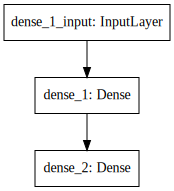

In [31]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

**Activate Neural Network**


In [32]:
# Fit the model
H = model.fit(XTrain, YTrain, 
              validation_data=(XVal, YVal), epochs=100)

# Save the mean squared errors
Train_MSE = np.array(H.history['mean_squared_error'])
Val_MSE = np.array(H.history['val_mean_squared_error'])

Train on 42 samples, validate on 15 samples
Epoch 1/100
42/42 [==============================] - 1s 13ms/step - loss: 10.4157 - mean_squared_error: 0.5594 - val_loss: 11.7790 - val_mean_squared_error: 2.5932
Epoch 2/100
42/42 [==============================] - 0s 446us/step - loss: 9.4191 - mean_squared_error: 0.3399 - val_loss: 10.9808 - val_mean_squared_error: 2.6882
Epoch 3/100
42/42 [==============================] - 0s 382us/step - loss: 8.4900 - mean_squared_error: 0.3025 - val_loss: 10.0960 - val_mean_squared_error: 2.6771
Epoch 4/100
42/42 [==============================] - 0s 541us/step - loss: 7.6283 - mean_squared_error: 0.3092 - val_loss: 8.6459 - val_mean_squared_error: 2.0464
Epoch 5/100
42/42 [==============================] - 0s 457us/step - loss: 6.7897 - mean_squared_error: 0.2834 - val_loss: 7.7211 - val_mean_squared_error: 1.8886
Epoch 6/100
42/42 [==============================] - 0s 418us/step - loss: 6.0316 - mean_squared_error: 0.2848 - val_loss: 7.1045 - val_me

Epoch 50/100
42/42 [==============================] - 0s 771us/step - loss: 0.0185 - mean_squared_error: 0.0092 - val_loss: 0.0496 - val_mean_squared_error: 0.0413
Epoch 51/100
42/42 [==============================] - 0s 727us/step - loss: 0.0172 - mean_squared_error: 0.0091 - val_loss: 0.0496 - val_mean_squared_error: 0.0423
Epoch 52/100
42/42 [==============================] - 0s 655us/step - loss: 0.0166 - mean_squared_error: 0.0094 - val_loss: 0.0526 - val_mean_squared_error: 0.0458
Epoch 53/100
42/42 [==============================] - 0s 813us/step - loss: 0.0164 - mean_squared_error: 0.0096 - val_loss: 0.0428 - val_mean_squared_error: 0.0365
Epoch 54/100
42/42 [==============================] - 0s 519us/step - loss: 0.0140 - mean_squared_error: 0.0078 - val_loss: 0.0465 - val_mean_squared_error: 0.0407
Epoch 55/100
42/42 [==============================] - 0s 653us/step - loss: 0.0132 - mean_squared_error: 0.0074 - val_loss: 0.0368 - val_mean_squared_error: 0.0310
Epoch 56/100
42/

42/42 [==============================] - 0s 359us/step - loss: 0.0106 - mean_squared_error: 0.0057 - val_loss: 0.0331 - val_mean_squared_error: 0.0283
Epoch 100/100
42/42 [==============================] - 0s 385us/step - loss: 0.0104 - mean_squared_error: 0.0056 - val_loss: 0.0269 - val_mean_squared_error: 0.0219


In [33]:
print(H.history.keys())  

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


Cross Validation Error minimum: 0.017775
Training Error minimum: 0.004220


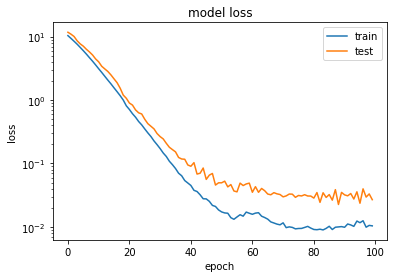

In [34]:
print('Cross Validation Error minimum: %f' % Val_MSE.min())
print('Training Error minimum: %f' % Train_MSE.min())

plt.figure() 
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.yscale('log')
plt.legend(['train', 'test'], loc='best') 
plt.savefig("Kitchen_Sink_Model1.png")
plt.show()

ETF Trading Predictions
-------------

In [35]:
predXTrain = model.predict(XTrain)
predXVal = model.predict(XVal)
AxLine=YVal.index[0] #Start of Cross Validation period and end of Training period

In [36]:
Headers=list(YTrain.columns.values)
PredictHeaders=[]
for i in Headers:
    PredictHeaders.append('Prediction '+i)

In [37]:
#Predicted TRAINING period for X
TrainXPred=pd.DataFrame(predXTrain,columns=[PredictHeaders],index=YTrain.index)
#Predicted VALIDATION for X
ValidXPred=pd.DataFrame(predXVal,columns=[PredictHeaders],index=YVal.index)
Predicted=TrainXPred.append(ValidXPred)
Observed=YTrain.append(YVal)

Final Prediction 1.20107


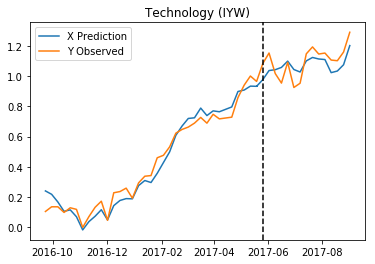

Final Prediction 1.24523


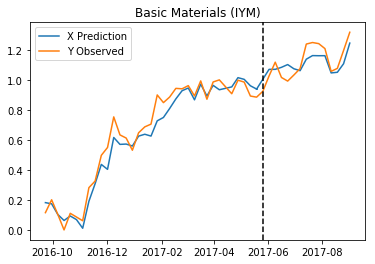

Final Prediction 1.36125


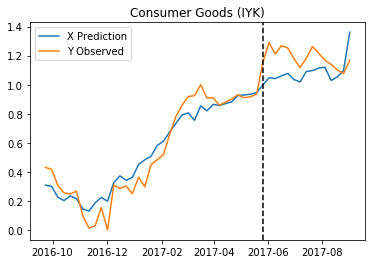

Final Prediction 1.18932


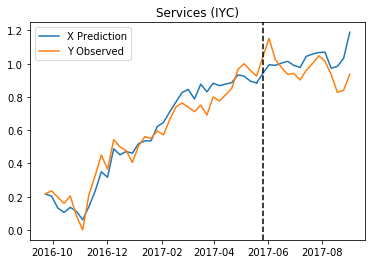

Final Prediction 1.04852


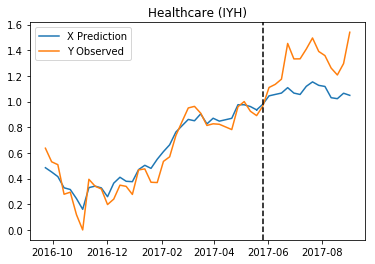

Final Prediction 1.3545


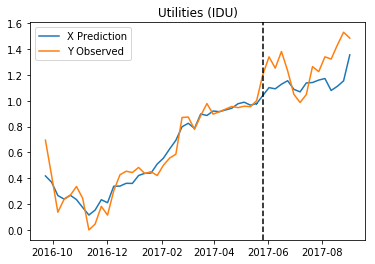

Final Prediction 1.16533


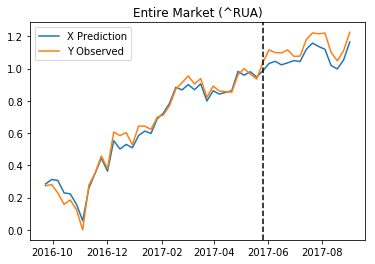

In [38]:
for i in range(0,(len(Headers))):
    plt.figure() 
    
    plt.plot(Predicted.iloc[:,i])
    plt.plot(Observed.iloc[:,i])
    plt.axvline(x=AxLine, label='prediction', linestyle='--', color='black')
    plt.legend(['X Prediction', 'Y Observed'], loc='best') 
    plt.title(Headers[i])
    print('Final Prediction',Predicted.iloc[-1,i])
    plt.savefig("KS_"+Headers[i]+".png")
    plt.show()

Full Independence Model: 
-------------------------

*NON-ETF Sector Stocks + Economic Indicators to Predict ETFs and Russel 3000; using the same dataset as the previous model.*


**Narrowing focus to 'Industry' not contained in Exchange Traded Funds (ETFs)**

*Technology, Basic Materials, Consumer Goods, Services, Healthcare, Utilities*


In [6]:
#Load all the data (to avoid having to recreate the datasets and continuing on from this point)
All_Stocks=pd.read_pickle('All_Stocks.pickle')
companyInfo=pd.read_pickle('companyInfo.pickle')
redIndicate=pd.read_pickle('redIndicate.pickle')
RUA3000=pd.read_pickle('RUA3000.pickle') 
Sector6=pd.read_pickle('Sector6.pickle') 

In [7]:
ETFSectors=companyInfo[companyInfo['Sector']!=('Technology' or 'Basic Materials' or 'Consumer Goods' or 'Services' or 'Healthcare' or 'Utilities')]
ETFSectorsList=list(ETFSectors['Symbol'])#Create list of of the stocks

In [8]:
ETFSectors.head(n=15)

,Symbol,CompanyName,Sector,Industry
0,ED,"Consolidated Edison, Inc.",Utilities,Electric Utilities
1,DD,E. I. du Pont de Nemours and Company,Basic Materials,Agricultural Chemicals
2,CVX,Chevron Corporation,Basic Materials,Major Integrated Oil & Gas
3,FL,"Foot Locker, Inc.",Consumer Goods,Textile - Apparel Footwear & Accessories
4,CAT,Caterpillar Inc.,Industrial Goods,Farm & Construction Machinery
5,IP,International Paper Company,Consumer Goods,Packaging & Containers
6,SJW,SJW Group,Utilities,Water Utilities
7,F,Ford Motor Company,Consumer Goods,Auto Manufacturers - Major
8,LLY,Eli Lilly and Company,Healthcare,Drug Manufacturers - Major
9,AVP,"Avon Products, Inc.",Consumer Goods,Personal Products


We can see stock NOT belonging to the ETF Stocks

In [9]:
import re
#create a register of unique column names from dataset
register=[]
for i in All_Stocks.columns.unique():
    register.append(i)
#create a basic dataframe to add results to
results=pd.DataFrame()
#for loop using regular expression looking for the names specified above
#Future make a function that does all this in one go with just naming an industry
for i in ETFSectorsList:
    #IndustryPattern=re.compile(r"'("+i+'-Close'".*?)'|'("+i+'-High'".*?)|'("+i+'-Open'".*?)|'("+i+'-Low'".*?)'", flags=re.IGNORECASE)
    #Fancy footwork here
    IndustryPattern=re.compile(r"'("+i+".*?)'", flags=re.IGNORECASE)
    listMatches=re.findall(IndustryPattern,str(register))
    #add regular expression results to dataframe
    results[listMatches]=All_Stocks[listMatches]
    print(i,'        ',ETFSectors['CompanyName'][ETFSectors['Symbol']==i][0])
NONETF_Kitchen_Sink=results.merge(redIndicate,how='left',on='Date').merge(Sector6,how='left',on='Date').merge(RUA3000,how='left',on='Date')

ED          Consolidated Edison, Inc.
DD          E. I. du Pont de Nemours and Company
CVX          Chevron Corporation
FL          Foot Locker, Inc.
CAT          Caterpillar Inc.
IP          International Paper Company
SJW          SJW Group
F          Ford Motor Company
LLY          Eli Lilly and Company
AVP          Avon Products, Inc.
NFG          National Fuel Gas Company
BF.A          NA
MATX          Matson, Inc.
BK          The Bank of New York Mellon Corporation
SNE          Sony Corporation
KR          The Kroger Co.
BP          BP p.l.c.
C          Citigroup Inc.
CL          Colgate-Palmolive Company
APA          Apache Corporation
DDS          Dillard's, Inc.
TSN          Tyson Foods, Inc.
OII          Oceaneering International, Inc.
BIF          NA
LAWS          Lawson Products, Inc.
GWW          W.W. Grainger, Inc.
JCP          J. C. Penney Company, Inc.
VNO          Vornado Realty Trust
LPX          Louisiana-Pacific Corporation
WABC          Westamerica Bancorporation
N

ETFC          E*TRADE Financial Corporation
FMS          Fresenius Medical Care AG & Co. KGAA
NCI          Navigant Consulting, Inc.
NVS          Novartis AG
PDS          Precision Drilling Corporation
PSO          Pearson plc
NUS          Nu Skin Enterprises, Inc.
EMITF          Elbit Imaging Ltd.
TESO          Tesco Corporation
SNAK          Inventure Foods, Inc.
SNHY          Sun Hydraulics Corporation
ESGR          Enstar Group Limited
ALV          Autoliv, Inc.
FBC          Flagstar Bancorp, Inc.
VTR          Ventas, Inc.
AMZN          Amazon.com, Inc.
SRT          StarTek, Inc.
FIX          Comfort Systems USA, Inc.
PSMT          PriceSmart, Inc.
PLCE          The Children's Place, Inc.
SRI          Stoneridge, Inc.
CHRW          C.H. Robinson Worldwide, Inc.
CSU          Capital Senior Living Corporation
SAH          Sonic Automotive, Inc.
GEOS          Geospace Technologies Corporation
AI          Arlington Asset Investment Corp.
NICK          Nicholas Financial, Inc.
PWR      

PACB          Pacific Biosciences of California, Inc.
GBAB          Guggenheim Taxable Municipal Managed Duration Trust
BAH          Booz Allen Hamilton Holding Corporation
RFP          Resolute Forest Products Inc.
OXLC          Oxford Lane Capital Corp.
AFT          Apollo Senior Floating Rate Fund Inc.
HCA          HCA Healthcare, Inc.
FF          FutureFuel Corp.
GNC          GNC Holdings, Inc.
THR          Thermon Group Holdings, Inc.
NMFC          NA
SAVE          Spirit Airlines, Inc.
P          Pandora Media, Inc.
WAIR          Wesco Aircraft Holdings, Inc.
GNE          Genie Energy Ltd.
VAC          Marriott Vacations Worldwide Corporation
DLPH          Delphi Automotive PLC
MN          Manning & Napier, Inc.
KORS          Michael Kors Holdings Limited
BCEI          Bonanza Creek Energy Inc.
CCXI          ChemoCentryx, Inc.
SIR          Select Income REIT
ALSN          Allison Transmission Holdings, Inc.
VNTV          Vantiv, Inc.
HTF          Horizon Technology Finance Corpor

In [10]:
#I am being over-cautious here trying to prevent I am not polluting my new data with previous data 
# even at the cost of duplicating my effort.
NONETF_Kitchen_Sink['year'], NONETF_Kitchen_Sink['week'], NONETF_Kitchen_Sink['day']=NONETF_Kitchen_Sink['Date'].dt.year, NONETF_Kitchen_Sink['Date'].dt.week, NONETF_Kitchen_Sink['Date'].dt.weekday_name
NONETF_Friday=NONETF_Kitchen_Sink[NONETF_Kitchen_Sink['day']=='Friday']
#Restricting to 1 year
NONETF_Friday_OneYear=NONETF_Friday.tail(n=52).copy()
NONETF_Friday_OneYear.drop(['year','week','day'],axis=1,inplace=True)
NONETF_Friday_OneYear.set_index('Date',drop=True,inplace=True)
#Saving this dataset prior to train test split 
NONETF_Friday_OneYear.to_pickle('NONETF_Friday_OneYear.pickle') 
#Replace missing values with interpolated values
NoNullNONETF=NONETF_Friday_OneYear.astype(float).interpolate(axis=1,method='linear')

In [11]:
sumData(NoNullNONETF)

,Estimates,ED-Close,EDU-Close,EDD-Close,EDI-Close,EDIT-Close,ED-High,EDU-High,EDD-High,EDI-High,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
0,DataType,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,ZeroVals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NullVals,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dupes,2,2,5,2,3,2,2,8,2,...,38,3,13,3,3,3,2,2,2,2
4,MinVal,67.7246,41.7688,6.51334,11.6527,13.1,68.5039,42.5346,6.53169,11.7615,...,103.669,9.36,1.56,113.878,74.7188,105.555,139.104,136.525,111.473,1230.73
5,MaxVal,85.53,87.89,8.11723,16.0281,26.02,85.68,91.99,8.14668,16.1437,...,116.392,127.295,138.198,149.101,92.4634,122.084,168.73,172.077,136.928,1465.45
6,AvgVal,76.1285,56.7111,7.34605,14.5873,17.67,76.4989,57.4421,7.43071,14.6724,...,104.131,11.985,2.33,133.085,86.7901,117.208,158.565,154.558,125.959,1402.77
7,StandDev,76.2174,60.1083,7.39003,14.2226,17.831,76.6802,61.0979,7.43589,14.322,...,104.655,16.63,7.45057,131.8,85.4873,115.089,156.784,153.926,124.43,1381.73
8,MedianVal,76.2174,60.1083,7.39003,14.2226,17.831,76.6802,61.0979,7.43589,14.322,...,104.655,16.63,7.45057,131.8,85.4873,115.089,156.784,153.926,124.43,1381.73
9,Quantile25,71.6127,48.3946,7.06227,13.1531,15.795,71.8984,48.7899,7.10843,13.2923,...,103.975,10.865,2.1975,120.297,83.1769,109.501,151.802,144.913,118.535,1345.39


Split The Data

In [12]:
train, validate, test = train_validate_test_split(NoNullNONETF)

Normalize the data

In [13]:
TrainMin=train.min()
TrainMax=train.max()

In [14]:
TrainNorm=featureNormalize(train)
TrainNorm[:5]

,ED-Close,EDU-Close,EDD-Close,EDI-Close,EDIT-Close,ED-High,EDU-High,EDD-High,EDI-High,EDIT-High,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-23,0.683356,0.178788,0.703007,0.376056,0.105263,0.690005,0.165153,0.768548,0.382122,0.135812,...,0.000000,0.161815,0.067308,0.105372,0.115004,0.430132,0.217515,0.636559,0.694509,0.273244
2016-09-30,0.411070,0.146801,0.726263,0.354171,0.029412,0.525577,0.145644,0.770706,0.391030,0.030653,...,0.000000,0.247432,0.000000,0.136372,0.200894,0.417286,0.235369,0.530809,0.419136,0.281232
2016-10-07,0.147645,0.124916,0.749690,0.400129,0.074303,0.219964,0.117053,0.763150,0.391030,0.139605,...,0.000000,0.263699,0.182692,0.136372,0.102629,0.306314,0.195821,0.508444,0.136945,0.229026
2016-10-14,0.184702,0.170034,0.640360,0.303402,0.026316,0.204468,0.160444,0.717814,0.351214,0.080425,...,0.000000,0.489726,0.182692,0.099114,0.000000,0.255388,0.159345,0.277955,0.235949,0.158496
2016-10-21,0.239481,0.161616,0.655980,0.345413,0.171827,0.219103,0.138917,0.672479,0.342214,0.163885,...,0.099441,0.286815,0.192308,0.129861,0.110637,0.247027,0.204268,0.293929,0.267370,0.185382


In [15]:
validateSet=validate.copy()
CrossNorm=(validateSet-TrainMin)/(TrainMax-TrainMin)
CrossNorm[:5]

,ED-Close,EDU-Close,EDD-Close,EDI-Close,EDIT-Close,ED-High,EDU-High,EDD-High,EDI-High,EDIT-High,...,IPMAN,VIXCLS,DGS10,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-26,1.143250,1.058249,1.098291,1.009490,0.195046,1.178747,1.040027,1.079252,1.028971,0.240744,...,0.540826,-0.050514,0.663462,1.082912,0.923769,1.153185,1.038994,0.964632,1.201383,1.037066
2017-06-02,1.261660,1.076095,1.196583,1.078288,0.085913,1.319442,1.080054,1.166429,1.098982,0.083460,...,0.540826,-0.055651,0.625000,1.152007,1.025655,1.290347,1.152886,1.109779,1.338854,1.116158
2017-06-09,1.238475,1.025926,1.163820,1.056938,0.202786,1.262810,1.196771,1.182281,1.060356,0.229135,...,0.540826,0.025685,0.605769,1.016365,1.118013,1.210978,1.025481,1.134124,1.252029,1.099034
2017-06-16,1.370961,1.080808,1.098291,1.011643,0.246130,1.412355,1.077027,1.103028,1.009501,0.231411,...,0.285722,-0.001712,0.576923,0.953452,1.016127,1.268771,0.977222,1.174546,1.380456,1.096946
2017-06-23,1.287329,1.034344,1.139247,0.767436,0.375387,1.368996,1.045745,1.103028,0.804843,0.356601,...,0.285722,-0.032534,0.567308,1.090550,0.991937,1.253359,0.936684,1.452902,1.230324,1.116262


Exchange Traded Funds and Market RUA (Russell 3000)

In [16]:
TrainNorm.iloc[:,3205:].head()

,Technology (IYW),Basic Materials (IYM),Consumer Goods (IYK),Services (IYC),Healthcare (IYH),Utilities (IDU),Entire Market (^RUA)
Date,,,,,,,
2016-09-23,0.105372,0.115004,0.430132,0.217515,0.636559,0.694509,0.273244
2016-09-30,0.136372,0.200894,0.417286,0.235369,0.530809,0.419136,0.281232
2016-10-07,0.136372,0.102629,0.306314,0.195821,0.508444,0.136945,0.229026
2016-10-14,0.099114,0.000000,0.255388,0.159345,0.277955,0.235949,0.158496
2016-10-21,0.129861,0.110637,0.247027,0.204268,0.293929,0.267370,0.185382


Everything Else (Stocks, Indicators)

In [17]:
TrainNorm.iloc[:,:3205].head()

,ED-Close,EDU-Close,EDD-Close,EDI-Close,EDIT-Close,ED-High,EDU-High,EDD-High,EDI-High,EDIT-High,...,HOUST,UNRATENSA,EMRATIO,UEMPMED,UMCSENT,USSLIND,KCFSI,IPMAN,VIXCLS,DGS10
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-23,0.683356,0.178788,0.703007,0.376056,0.105263,0.690005,0.165153,0.768548,0.382122,0.135812,...,0.344203,0.9,0.0,1.00,0.230088,0.409836,0.903226,0.000000,0.161815,0.067308
2016-09-30,0.411070,0.146801,0.726263,0.354171,0.029412,0.525577,0.145644,0.770706,0.391030,0.030653,...,0.344203,0.9,0.0,1.00,0.353982,0.409836,0.903226,0.000000,0.247432,0.000000
2016-10-07,0.147645,0.124916,0.749690,0.400129,0.074303,0.219964,0.117053,0.763150,0.391030,0.139605,...,0.344203,0.7,0.2,0.25,0.353982,0.000000,0.903226,0.000000,0.263699,0.182692
2016-10-14,0.184702,0.170034,0.640360,0.303402,0.026316,0.204468,0.160444,0.717814,0.351214,0.080425,...,0.344203,0.7,0.2,0.25,0.353982,0.000000,0.741935,0.000000,0.489726,0.182692
2016-10-21,0.239481,0.161616,0.655980,0.345413,0.171827,0.219103,0.138917,0.672479,0.342214,0.163885,...,0.000000,0.7,0.2,0.25,0.353982,0.000000,0.741935,0.099441,0.286815,0.192308


In [18]:
YTrain=TrainNorm.iloc[:,3205:]
YVal=CrossNorm.iloc[:,3205:]

XTrain=TrainNorm.iloc[:,:3205]
XVal=CrossNorm.iloc[:,:3205]
print("Training Sets")
print("X's training set shape: \n",XTrain.shape)
print("Y's training set shape: \n",YTrain.shape)
print("                                       ")
print("Validation Sets")
print("X's validation set shape: \n",XVal.shape)
print("Y's validation set shape: \n",YVal.shape)

Training Sets
X's training set shape: 
 (42, 3205)
Y's training set shape: 
 (42, 7)
                                       
Validation Sets
X's validation set shape: 
 (15, 3205)
Y's validation set shape: 
 (15, 7)


In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
#https://keras.io/layers/core/

# Define NN model architecture: we will use the seqential model.
model = Sequential()

# Add the first hidden layer                               Added Regularization
model.add(Dense(10, input_shape=(3205,), activation='relu', kernel_regularizer=regularizers.l2(.5),))

# Add the output layer
model.add(Dense(7))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Print the model summary
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                32060     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 32,137
Trainable params: 32,137
Non-trainable params: 0
_________________________________________________________________


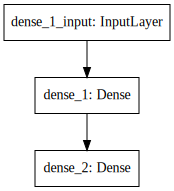

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [21]:
# Fit the model
H = model.fit(XTrain, YTrain, 
              validation_data=(XVal, YVal), epochs=100)

# Save the mean squared errors
Train_MSE = np.array(H.history['mean_squared_error'])
Val_MSE = np.array(H.history['val_mean_squared_error'])

Train on 42 samples, validate on 15 samples
Epoch 1/100
42/42 [==============================] - 0s 12ms/step - loss: 10.6504 - mean_squared_error: 0.8197 - val_loss: 33906.7734 - val_mean_squared_error: 33897.3906
Epoch 2/100
42/42 [==============================] - 0s 518us/step - loss: 9.7187 - mean_squared_error: 0.4150 - val_loss: 31484.5000 - val_mean_squared_error: 31475.7832
Epoch 3/100
42/42 [==============================] - 0s 467us/step - loss: 8.9106 - mean_squared_error: 0.2742 - val_loss: 28682.8164 - val_mean_squared_error: 28674.7793
Epoch 4/100
42/42 [==============================] - 0s 343us/step - loss: 8.2053 - mean_squared_error: 0.2496 - val_loss: 27077.5098 - val_mean_squared_error: 27070.1465
Epoch 5/100
42/42 [==============================] - 0s 516us/step - loss: 7.5965 - mean_squared_error: 0.3102 - val_loss: 27404.9434 - val_mean_squared_error: 27398.2246
Epoch 6/100
42/42 [==============================] - 0s 404us/step - loss: 6.8878 - mean_squared_erro

42/42 [==============================] - 0s 413us/step - loss: 0.0798 - mean_squared_error: 0.0076 - val_loss: 9272.9570 - val_mean_squared_error: 9272.8896
Epoch 49/100
42/42 [==============================] - 0s 430us/step - loss: 0.0734 - mean_squared_error: 0.0069 - val_loss: 8821.0498 - val_mean_squared_error: 8820.9883
Epoch 50/100
42/42 [==============================] - 0s 302us/step - loss: 0.0678 - mean_squared_error: 0.0066 - val_loss: 8366.1953 - val_mean_squared_error: 8366.1387
Epoch 51/100
42/42 [==============================] - 0s 400us/step - loss: 0.0628 - mean_squared_error: 0.0063 - val_loss: 8032.4233 - val_mean_squared_error: 8032.3706
Epoch 52/100
42/42 [==============================] - 0s 434us/step - loss: 0.0586 - mean_squared_error: 0.0063 - val_loss: 7509.9287 - val_mean_squared_error: 7509.8799
Epoch 53/100
42/42 [==============================] - 0s 368us/step - loss: 0.0540 - mean_squared_error: 0.0058 - val_loss: 7142.4688 - val_mean_squared_error: 714

42/42 [==============================] - 0s 359us/step - loss: 0.0130 - mean_squared_error: 0.0056 - val_loss: 743.7123 - val_mean_squared_error: 743.7051
Epoch 97/100
42/42 [==============================] - 0s 296us/step - loss: 0.0147 - mean_squared_error: 0.0075 - val_loss: 652.8340 - val_mean_squared_error: 652.8271
Epoch 98/100
42/42 [==============================] - 0s 436us/step - loss: 0.0164 - mean_squared_error: 0.0094 - val_loss: 680.3425 - val_mean_squared_error: 680.3356
Epoch 99/100
42/42 [==============================] - 0s 376us/step - loss: 0.0127 - mean_squared_error: 0.0057 - val_loss: 705.1685 - val_mean_squared_error: 705.1616
Epoch 100/100
42/42 [==============================] - 0s 290us/step - loss: 0.0144 - mean_squared_error: 0.0074 - val_loss: 645.1643 - val_mean_squared_error: 645.1573


Cross Validation Error minimum: 645.157288
Training Error minimum: 0.005383


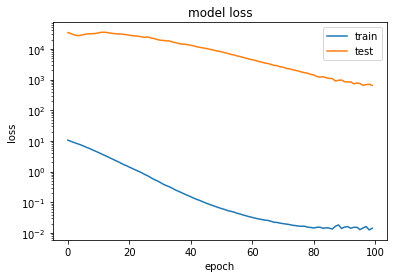

In [22]:
print('Cross Validation Error minimum: %f' % Val_MSE.min())
print('Training Error minimum: %f' % Train_MSE.min())

plt.figure() 
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.yscale('log')
plt.legend(['train', 'test'], loc='best') 
plt.savefig("Kitchen_Sink_Model1.png")
plt.show()